---
# 라이브러리
---

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models

---
# 데이터 준비
---

In [8]:
train_df = pd.read_csv(r"C:\Users\BIG3-05\Downloads\open\train.csv")
test_df = pd.read_csv(r"C:\Users\BIG3-05\Downloads\open\test.csv")
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15834 entries, 0 to 15833
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   img_path          15834 non-null  object
 1   upscale_img_path  15834 non-null  object
 2   label             15834 non-null  object
dtypes: object(3)
memory usage: 371.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6786 entries, 0 to 6785
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6786 non-null   object
 1   img_path  6786 non-null   object
dtypes: object(2)
memory usage: 106.2+ KB


---
# CNN
---

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoder를 사용하여 라벨을 숫자로 변환
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['label'])

# OneHotEncoder를 사용하여 원핫 인코딩
onehot_encoder = OneHotEncoder()
train_labels_onehot = onehot_encoder.fit_transform(train_labels_encoded.reshape(-1, 1))

# 클래스의 개수 계산
num_classes = train_labels_onehot.shape[1]

# 이미지 데이터 제너레이터 설정
datagen = ImageDataGenerator(rescale=1./255)  # 이미지 스케일링


In [10]:
# Train 데이터 제너레이터
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="upscale_img_path",  # 고해상도 이미지 파일 경로 컬럼
    y_col="label",               # 라벨 컬럼
    target_size=(256, 256),      # 고해상도 이미지 크기
    batch_size=16,
    class_mode="categorical",    # 다중 클래스 분류 문제
    shuffle=True,
)

Found 15834 validated image filenames belonging to 25 classes.


In [11]:
# 모델 구성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

C:\Users\BIG3-05\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # 다중 클래스 분류 문제이므로 categorical_crossentropy 사용
              metrics=['accuracy'])

# 모델 훈련
model.fit(train_generator, epochs=10)

Epoch 1/10


C:\Users\BIG3-05\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


990/990 ━━━━━━━━━━━━━━━━━━━━ 194s 195ms/step - accuracy: 0.0543 - loss: 3.3309
Epoch 2/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 189s 190ms/step - accuracy: 0.1142 - loss: 3.0891
Epoch 3/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 189s 191ms/step - accuracy: 0.2779 - loss: 2.5428
Epoch 4/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 190s 192ms/step - accuracy: 0.5207 - loss: 1.6416
Epoch 5/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 190s 191ms/step - accuracy: 0.7920 - loss: 0.7310
Epoch 6/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 190s 191ms/step - accuracy: 0.9131 - loss: 0.3308
Epoch 7/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 190s 192ms/step - accuracy: 0.9607 - loss: 0.1683
Epoch 8/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 189s 191ms/step - accuracy: 0.9737 - loss: 0.1242
Epoch 9/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 189s 190ms/step - accuracy: 0.9815 - loss: 0.0837
Epoch 10/10
990/990 ━━━━━━━━━━━━━━━━━━━━ 190s 191ms/step - accuracy: 0.9828 - loss: 0.0837


---
# Model test
---

In [13]:
# 테스트 이미지 전처리를 위해 동일한 ImageDataGenerator 사용
test_datagen = ImageDataGenerator(rescale=1./255)

# 데이터프레임에서 테스트 이미지 흐름 생성
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="img_path",
    y_col=None,
    target_size=(256, 256),  # 모델의 입력 형태와 일치시킴
    batch_size=16,
    class_mode=None,  # 테스트 데이터에는 라벨이 없습니다
    shuffle=False  # 순서를 유지하기 위해 셔플하지 않습니다
)

# 테스트 이미지로 예측
predictions = model.predict(test_generator)

# 예측 결과 디코딩
predicted_labels = label_encoder.inverse_transform(predictions.argmax(axis=1))
test_df['label'] = predicted_labels

# 'img_path' 열을 제외하고 CSV 파일로 저장
test_df.drop(columns=['img_path'], inplace=True)
test_df.to_csv("test_predicted.csv", index=False)

Found 6786 validated image filenames.
425/425 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step


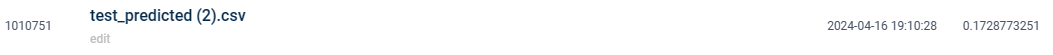